Lastly, you’ll learn how to overcome the common pitfalls of using categorical data. You’ll also grow your data encoding skills as you are introduced to label encoding and one-hot encoding—perfect for helping you prepare your data for use in machine learning algorithms.

## Categorical pitfalls
#### Overcoming pitfalls: string issues
Being able to effectively use categorical pandas Series is an important skill to have in your toolbelt. Unfortunately, there are several common problems that you may run into when using these Series.

In this exercise, you will work through code from a previous exercise on updating a categorical Series. Follow the instructions to make sure everything goes smoothly. The used cars dataset, used_cars, is loaded for you.

In [9]:
import pandas as pd
used_cars = pd.read_csv("cars.csv")
used_cars

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [10]:
# Print the frequency table of body_type and include NaN values
print(used_cars["body_type"].value_counts(dropna=False))
print("\n")
# Update NaN values
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

# Convert body_type to title case
used_cars["body_type"] = used_cars["body_type"].str.title()

# Print the frequency table of body_type and include NaN values
print(used_cars["body_type"].value_counts())
print("\n")

# Check the dtype
print(used_cars["body_type"].dtype)

sedan        13010
hatchback     7643
universal     5502
suv           5162
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
NaN              9
Name: body_type, dtype: int64


Sedan        13010
Hatchback     7643
Universal     5502
Suv           5162
Minivan       3608
Minibus       1369
Van            808
Coupe          652
Liftback       552
Pickup         129
Cabriolet       75
Limousine       12
Other            9
Name: body_type, dtype: int64


object


Excellent work! Categorical Series can be tricky. When in doubt, check the changes you have made and convert back to a categorical Series if needed. In this example you made 3 changes and the last one converted the Series to an object. This required you to convert it back to categorical before continuing.

#### Overcoming pitfalls: using NumPy arrays
A local used car company manually appraises each car that they add to their inventory. When a new car comes in, they select from a drop-down menu, giving the car a rating between 1 and 5. A 1 means that the car probably won't sell as is, but a 5 indicates the car will definitely sell without a problem.

With over 38,000 cars in their inventory, the company has asked you to give them an average "sellability" of their cars. For this exercise, use the used_cars dataset. The column of interest is called "Sale Rating" and it is currently a categorical column.

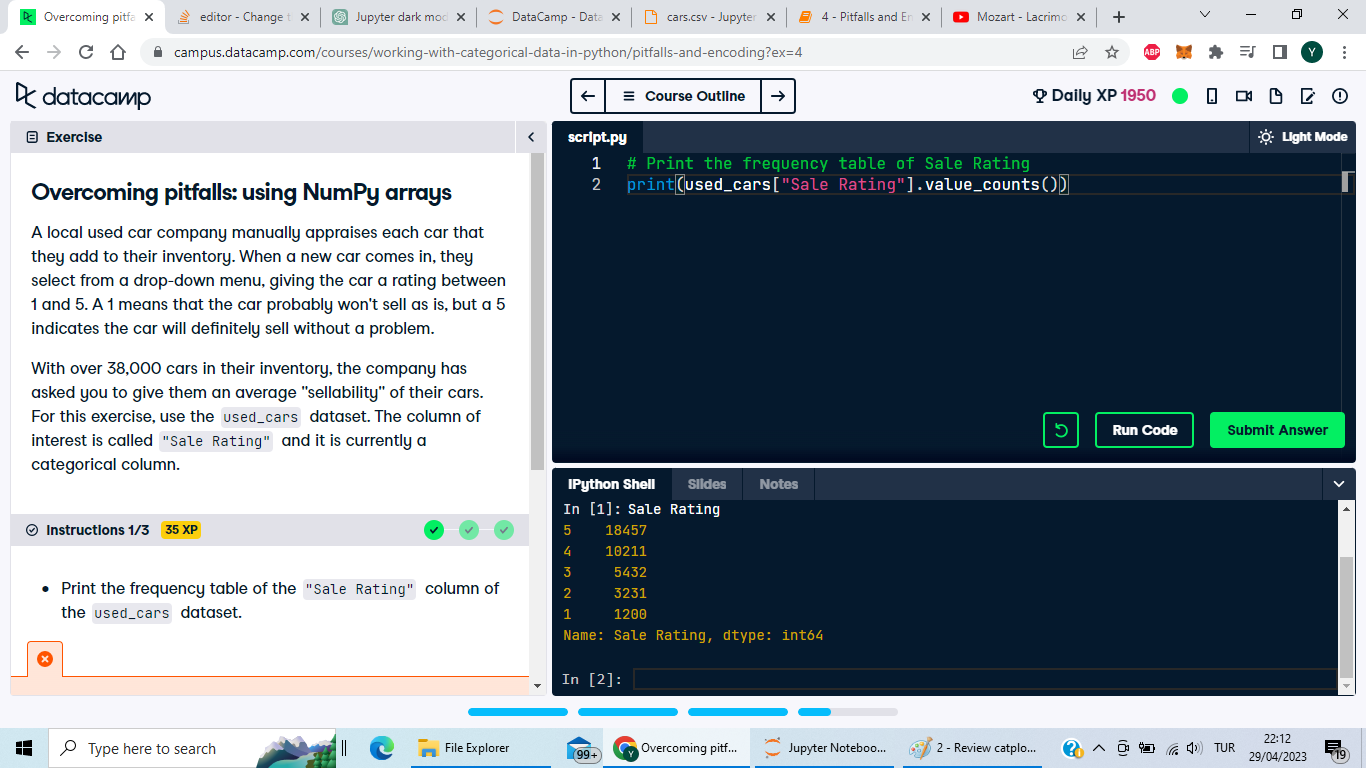

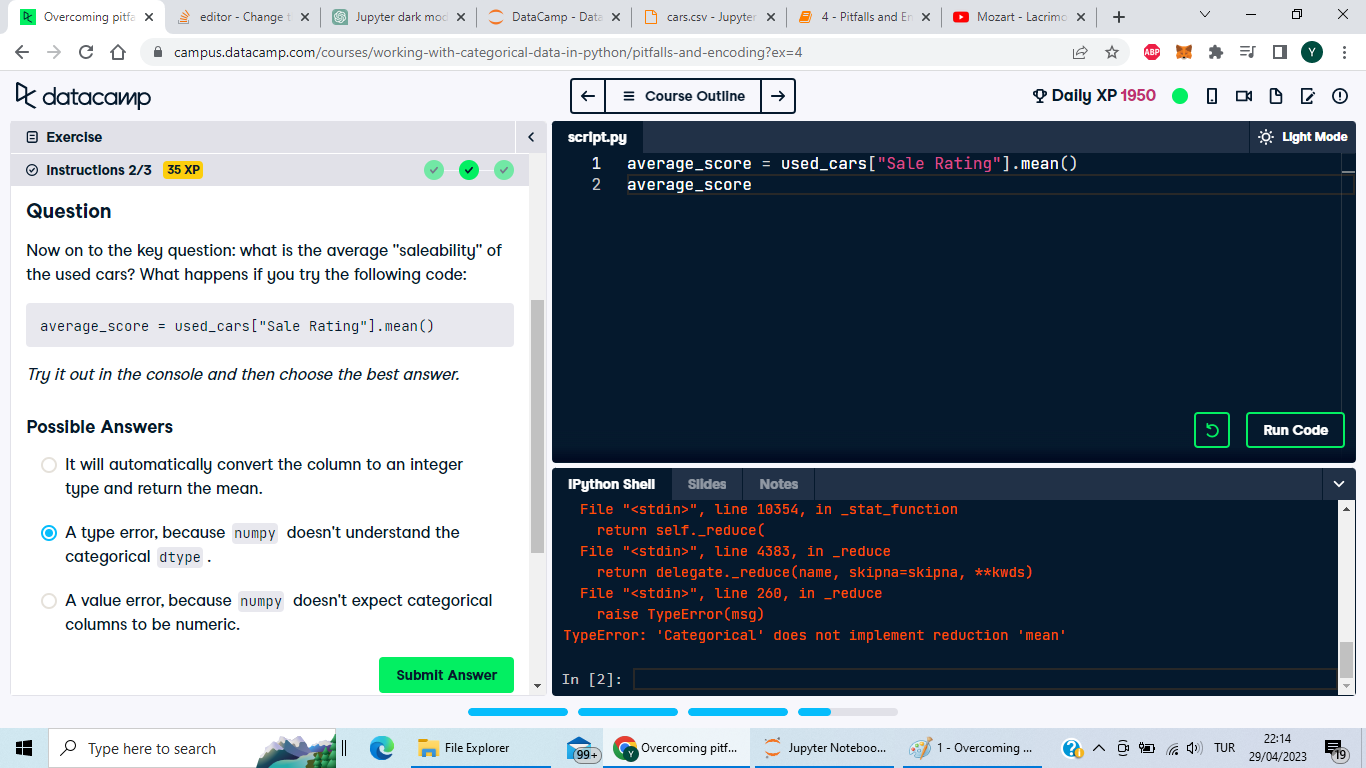

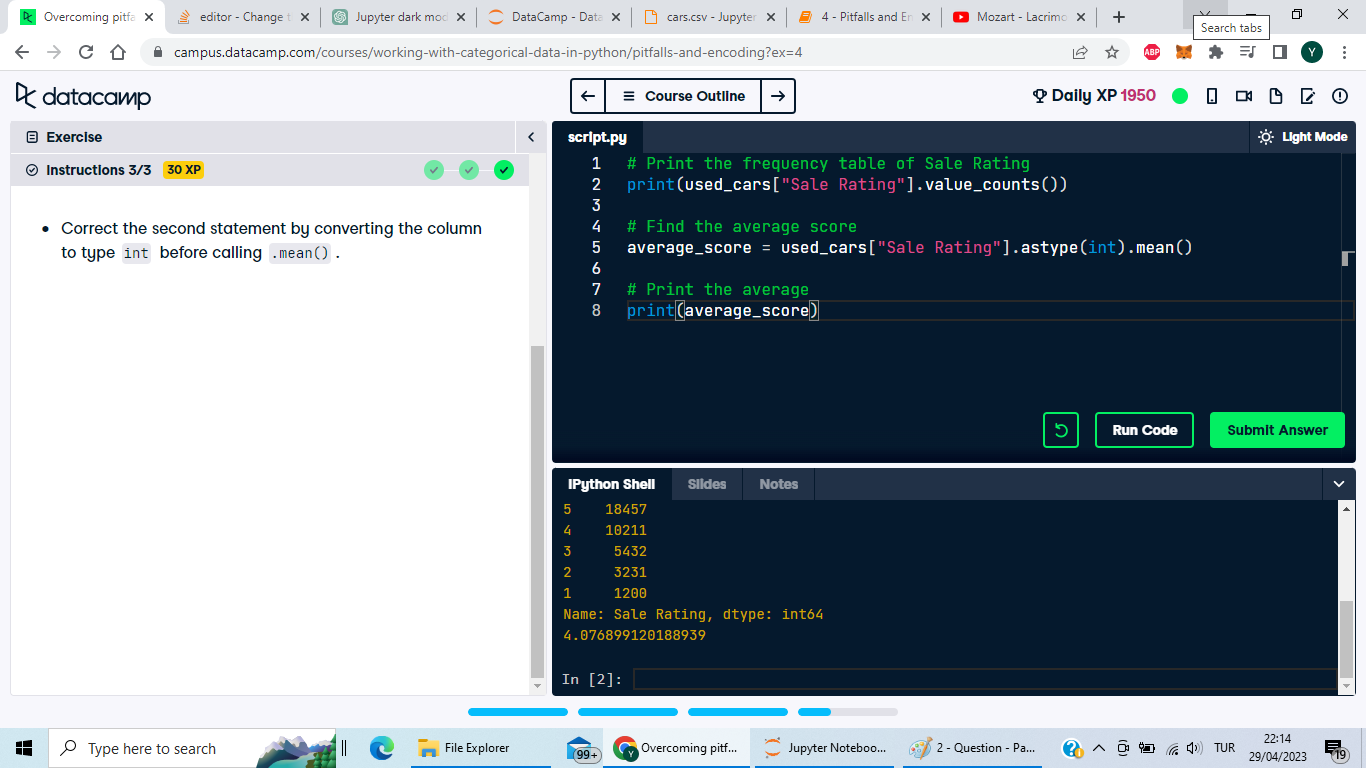

Great work! The used cars sellability was above 4 on average. In this context, it is OK to have this column as categorical. There are only five possible responses and no other value will be allowed in this column.

## Label encoding
#### Create a label encoding and map
A used car company believes that they can predict a car's sales price reasonably well using their used_cars dataset. One of the variables they want to use, "color", needs to be converted to codes. The company believes that a car's color will be important when predicting sales price.

In [13]:
# Convert to categorical and print the frequency table
used_cars["color"] = used_cars["color"].astype("category")
print(used_cars["color"].value_counts())
print("\n")

# Create a label encoding
used_cars["color_code"] = used_cars["color"].cat.codes

# Create codes and categories objects
codes = used_cars["color"].cat.codes
categories = used_cars["color"]
color_map = dict(zip(codes, categories))

# Print the map
print(color_map)

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64


{8: 'silver', 1: 'blue', 7: 'red', 0: 'black', 4: 'grey', 6: 'other', 2: 'brown', 10: 'white', 3: 'green', 9: 'violet', 5: 'orange', 11: 'yellow'}


Well done! You successfully created a label encoding for the color column. Creating an encoding like this can save on memory and improve performance. Reading and writing files that use codes instead of strings can save a lot of time.

#### Using saved mappings
You are using a subset of a dataset and have been asked to create visualizations summarizing the output. As the dataset currently stands, all you see are numbers! Luckily, you had created and saved dictionaries (color_map, fuel_map, and transmission_map) that will map these columns back to their original categorical names. The dataset used_cars_updated has been preloaded. A preview of the dataset is shown. Check out the console to view the column data types.<br>
<br>
       engine_fuel  color  transmission  price_usd<br>
0                3      8             0   10900.00<br>
1                3      1             0    5000.00<br>
2                3      7             0    2800.00<br>

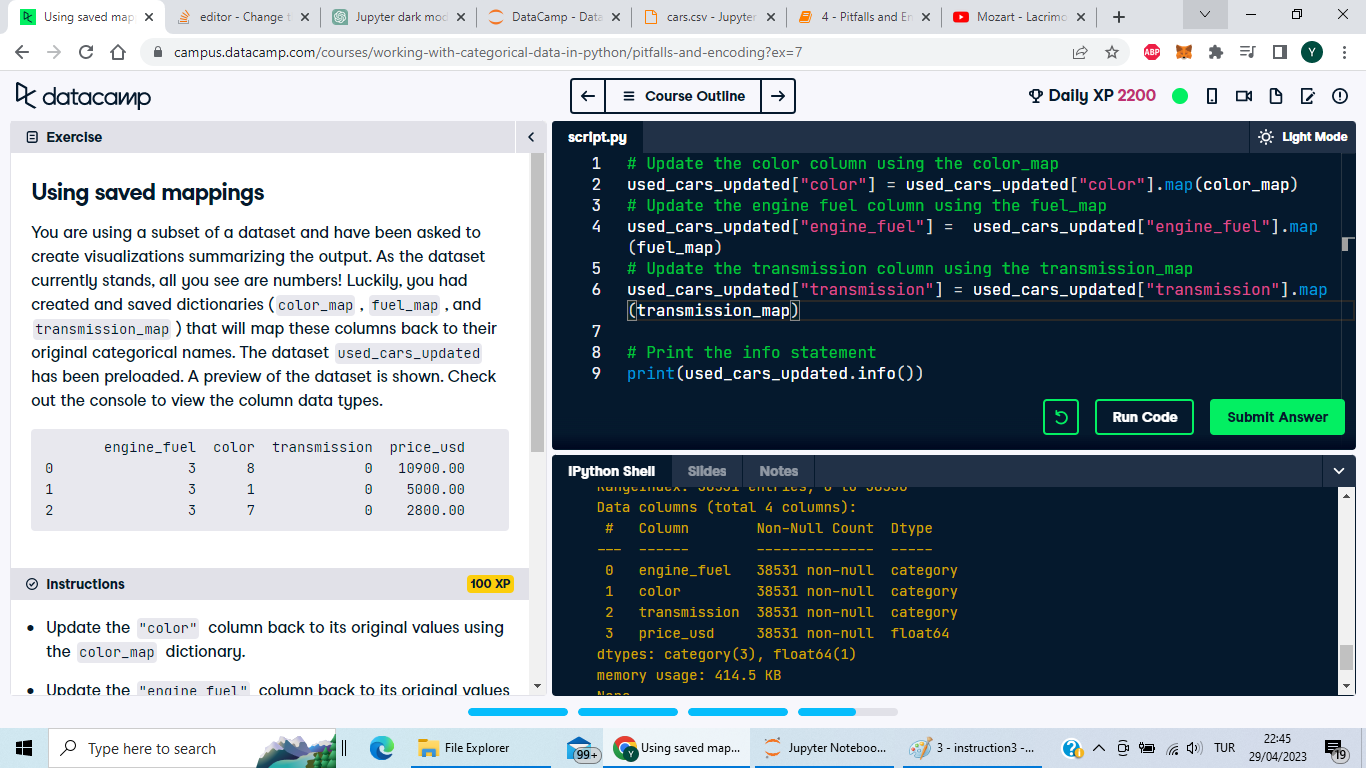

Great job. When you start making visualizations it will be really helpful to have the actual values and not the just the codes. Also notice that the categorical dtype was preserved when we mapped the integers back to their original values. In this case, we don't need to convert each column back to a categorical Series.

#### Creating a Boolean encoding
In preparation for running machine learning models to estimate the sale price of used cars, you are starting to analyze the available columns of the used_cars dataset and want to create columns that can be used in training. One of the managers of a used car dealership has said that the manufacturer of the car is the most important aspect he considers when setting prices. You will begin by exploring the manufacturer_name column.

In [18]:
import numpy as np

# Print the manufacturer name frequency table
print(used_cars["manufacturer_name"].value_counts())
print("\n")

# Create a Boolean column based on if the manufacturer name that contain Volkswagen
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), True,False
)
print(used_cars["is_volkswagen"].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [20]:
# Create a Boolean column based on if the manufacturer name that contain Volkswagen: using 0s an 1s
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)

# Check the final frequency table
print(used_cars["is_volkswagen"].value_counts())

0    34288
1     4243
Name: is_volkswagen, dtype: int64


Great job! A lot of methods in Python will return True/False values as 0s and 1s. For consistency, sometimes you may want to save the column with actualy True and False values, while sometimes you might want to use 0s and 1s.

## One-hot encoding


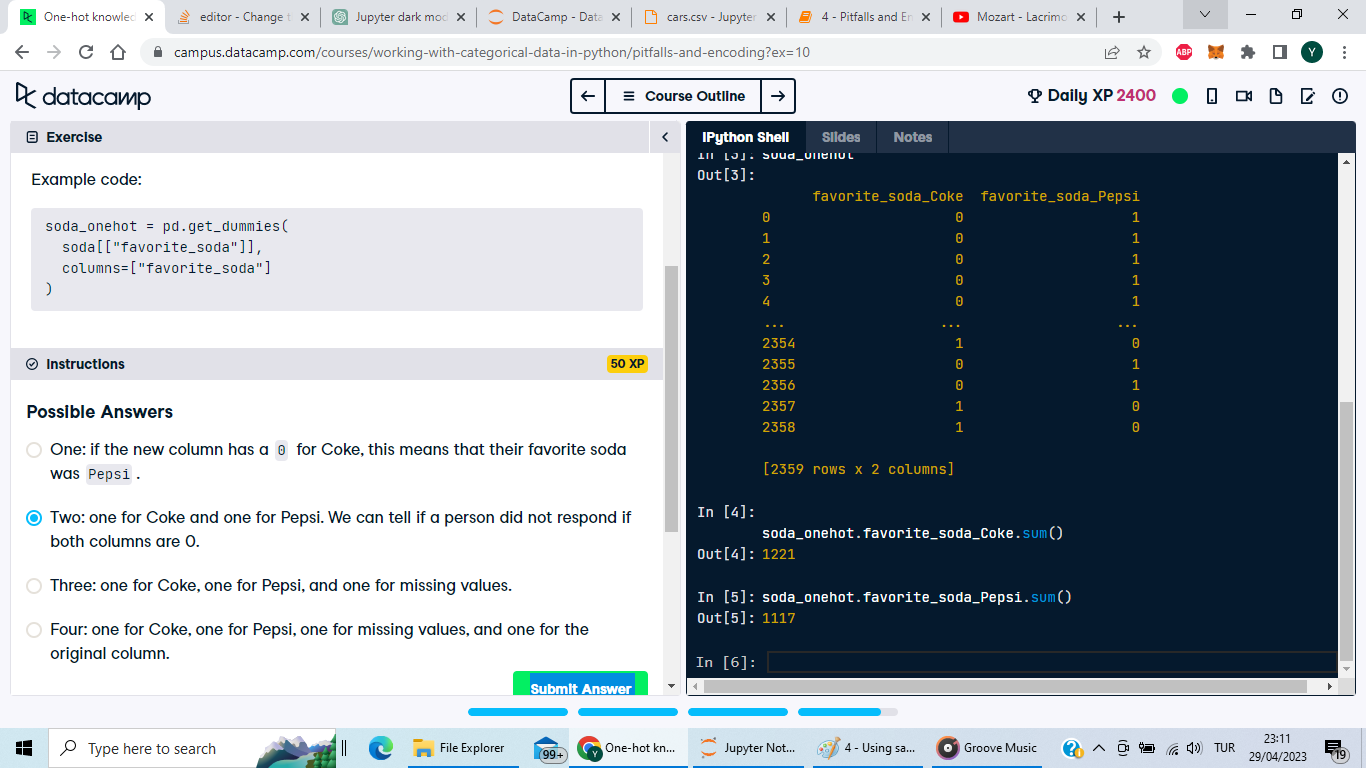

Great work! One-hot encoding this column will result in two columns. The original column is dropped, and a new column for missing values is not created.

#### One-hot encoding specific columns
A local used car dealership wants your help in predicting the sale price of their vehicles. If you use one-hot encoding on the entire used_cars dataset, the new dataset has over 1,200 columns. You are worried that this might lead to problems when training your machine learning models to predict price. You have decided to try a simpler approach and only use one-hot encoding on a few columns.

In [21]:
# Create one-hot encoding for just two columns
used_cars_simple = pd.get_dummies(
  used_cars,
  # Specify the columns from the instructions
  columns=["manufacturer_name","transmission"],
  # Set the prefix
  prefix="dummy"
)

# Print the shape of the new dataset
print(used_cars_simple.shape)

(38531, 87)


Awesome work. Instead of having over 1,200 columns, this simple dataset only has 85. You won't be able to use categorical columns that have not been encoded, but limiting which categorical columns are included in your algorithm may prevent overfitting and help the dealership quickly assess a car's potential sale price. Tweet us your feedback and tell us what you think.